In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Init Plugin
Init Graph Optimizer
Init Kernel
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
img_dir = '/Users/adityavs14/Documents/Internship/Pianalytix/Brain_tumor/ML_model/Brain_Tumor_Data_Set'

In [59]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [60]:
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split = 0.2)

In [61]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 3681 images belonging to 2 classes.


In [62]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 919 images belonging to 2 classes.


In [63]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['Brain_Tumor', 'Healthy']


# Making the model

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [83]:

model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(150, 150, 1)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               21234176  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

In [87]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=5,validation_data=val_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)

Epoch 1/5
57/57 [==============================] - 8s 144ms/step - loss: 0.0384 - accuracy: 0.9903 - val_loss: 0.0375 - val_accuracy: 0.9888
Epoch 2/5
57/57 [==============================] - 8s 143ms/step - loss: 0.0201 - accuracy: 0.9961 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 3/5
57/57 [==============================] - 8s 143ms/step - loss: 0.0102 - accuracy: 0.9992 - val_loss: 0.0294 - val_accuracy: 0.9900
Epoch 4/5
57/57 [==============================] - 8s 144ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.0240 - val_accuracy: 0.9933
Epoch 5/5
57/57 [==============================] - 8s 143ms/step - loss: 0.0046 - accuracy: 0.9997 - val_loss: 0.0261 - val_accuracy: 0.9933


In [18]:
#train_loss, train_acc = model.evaluate(train_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)
test_loss, test_acc   = model.evaluate(val_gen)

    723/Unknown - 85s 118ms/step - loss: 0.4561 - accuracy: 0.7822

KeyboardInterrupt: 

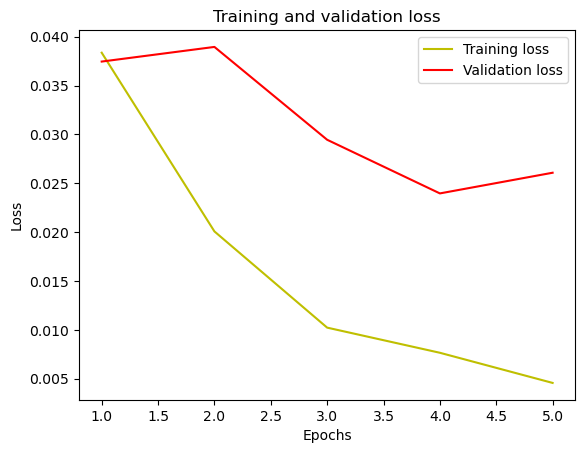

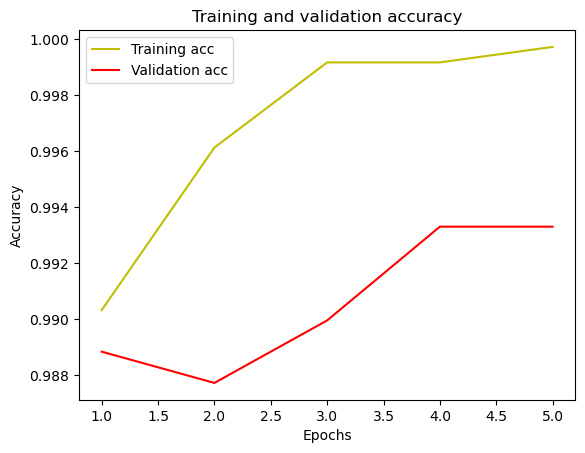

In [88]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [98]:
model.save('model.h5')

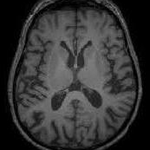

In [96]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps


data = np.ndarray(shape=(1,150, 150, 1), dtype=np.float32)
image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Brain_tumor/ML_model/Brain_Tumor_Data_Set/Healthy/Not Cancer  (1631).jpg')
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Brain_tumor/ML_model/Brain_Tumor_Data_Set/Brain_Tumor/Cancer (1895).jpg')
size = (150, 150)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
#normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = image_array.reshape((-1,150,150,1))
#data[0] = normalized_image_array

In [97]:
prediction = model.predict(data)
print(prediction[0][0])


1.0
